# Deceleration Scan Plots

## Magnetic Lens, Monte Carlo Particle Trajectory Simulations

**Andrew Winnicki**<br/>
**Summer 2020**<br/>


<hr style='height:2px'>

---



In [8]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# set seaborn plotting style
sns.set_style("darkgrid")

In [9]:
# import csv files and convert to pandas dataframe
scan_lens = pd.read_csv('manual_test.csv')
# scan_nolens = pd.read_csv('{}/no_lens_{}.csv'.format(date, date))

# create list of strings for column names
ints = list(range(0, 4))
ints = list(map(str, ints))

# add mean columns
scan_lens['mean'] = scan_lens[ints].mean(axis=1)
# scan_nolens['mean'] = scan_nolens[ints].mean(axis=1)

# add std deviation columns
scan_lens['std_dev'] = scan_lens[ints].std(axis=1)
# scan_nolens['std_dev'] = scan_nolens[ints].std(axis=1)

# drop unwanted columns
scan_lens = scan_lens.dropna(axis='columns')

# display dataframe for error checking
scan_lens

,z_decel,0,1,2,3,4,5,mean,std_dev
0,0.0,0.67,0.53,0.64,0.60,0.65,0.57,0.6100,0.060553
1,-10000.0,0.52,0.64,0.66,0.64,0.54,0.60,0.6150,0.064031
2,-20000.0,0.58,0.57,0.55,0.52,0.60,0.53,0.5550,0.026458
3,-30000.0,0.53,0.61,0.55,0.56,0.52,0.68,0.5625,0.034034
4,-40000.0,0.56,0.59,0.49,0.57,0.60,0.55,0.5525,0.043493
5,-50000.0,0.59,0.53,0.63,0.54,0.63,0.54,0.5725,0.046458
6,-60000.0,0.56,0.61,0.51,0.48,0.70,0.60,0.5400,0.057155
7,-70000.0,0.53,0.53,0.51,0.64,0.52,0.51,0.5525,0.059090
8,-80000.0,0.49,0.55,0.46,0.58,0.52,0.52,0.5200,0.054772
9,-90000.0,0.44,0.61,0.57,0.53,0.53,0.52,0.5375,0.072744


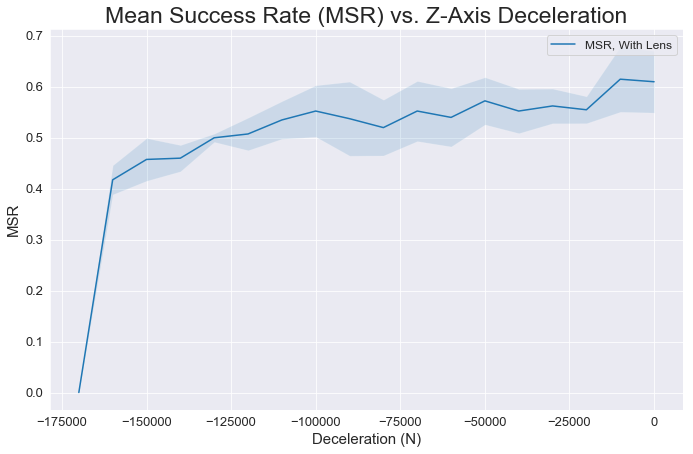

In [14]:
# pull relevant data from dataframes
z_decel = scan_lens['z_decel']
mean_lens = scan_lens['mean']
std_lens = scan_lens['std_dev']
# mean_nolens = scan_nolens['mean'] / 100
# std_nolens = scan_nolens['std_dev'] / 100

# plot results
plt.figure(figsize=(7*1.62, 7))
sns.lineplot(z_decel, mean_lens, label='MSR, With Lens')
plt.fill_between(z_decel, mean_lens + std_lens, mean_lens - std_lens, alpha=0.15)
# plt.axhline(y=float(mean_nolens), ls=':', color='r', label='MSR, No Lens')

# labels
plt.title('Mean Success Rate (MSR) vs. Z-Axis Deceleration', fontsize=23)
plt.xlabel('Deceleration (N)', fontsize=15)
plt.ylabel('MSR', fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.legend(fontsize=12)
plt.show()